Problematica: La dimensionalidad del dataset, mas de 10 columnas con diferentes tipos de informacion
Al tener una dimensionalidad tan grande el modelo puede quedar sesgado y su rendimiento no sera optimo.


Nuestra misión es aplicar técnicas de reducción de dimensionalidad para 
transformar este complejo conjunto de datos en uno más simple y manejable, sin perder la 
información esencial.


Objetivo: que el equipo de marketing pueda visualizar y entender los distintos perfiles de clientes para la campaña de los "Aura Pro" (audifonos).

# Paso 2. Análisis Exploratorio de Datos (EDA).

In [3]:
#Importacion de libreria pandas necesaria para cargar, limpiar y organizar el df

import pandas as pd
df = pd.read_csv('quantum_customer_data.csv')
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
0,CUST-0001,53,65,57,26,360,58,48,126,19.74,11
1,CUST-0002,32,45,73,15,176,97,27,146,19.51,9
2,CUST-0003,65,51,82,2,18,65,23,53,23.92,2
3,CUST-0004,56,49,22,21,149,41,30,76,22.67,6
4,CUST-0005,34,61,53,23,233,3,36,158,29.45,14


Columnas del dataset:

SpendingScore = Puntuación de 1 a 100 asignada por la empresa, según el comportamiento de gasto.

WebVisits =  Número total de visitas al sitio web en el último año. 

DaysSinceLastPurchase = Número de días desde la última compra realizada por el cliente. 

EmailsOpened = Cantidad de correos de marketing abiertos en el último año. 

AdClicks = Cantidad de clics en anuncios digitales en el último año. 

SocialMediaInteractions= Número de interacciones (likes, comentarios) en las redes sociales de la marca. 

AvgSessionDuration = Duración promedio de la sesión en el sitio web (en minutos). 

ItemsInCart = Número promedio de artículos dejados en el carrito de compras.

In [4]:
# analisis exploratorio
print(f'Tamaño del dataset: {df.shape}')
print(f'Numero de valores nulos: {df.isnull().sum()}')


Tamaño del dataset: (1000, 11)
Numero de valores nulos: CustomerID                 0
Age                        0
AnnualIncome               0
SpendingScore              0
WebVisits                  0
DaysSinceLastPurchase      0
EmailsOpened               0
AdClicks                   0
SocialMediaInteractions    0
AvgSessionDuration         0
ItemsInCart                0
dtype: int64


In [5]:
print(f'Informacion relevante del dataset:')
df.info()

Informacion relevante del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   AnnualIncome             1000 non-null   int64  
 3   SpendingScore            1000 non-null   int64  
 4   WebVisits                1000 non-null   int64  
 5   DaysSinceLastPurchase    1000 non-null   int64  
 6   EmailsOpened             1000 non-null   int64  
 7   AdClicks                 1000 non-null   int64  
 8   SocialMediaInteractions  1000 non-null   int64  
 9   AvgSessionDuration       1000 non-null   float64
 10  ItemsInCart              1000 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 86.1+ KB


In [6]:
df.describe()

,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,43.359000,84.076000,48.834000,14.89000,185.308000,49.127000,24.48600,98.778000,15.377490,7.21600
std,15.223267,37.114872,28.356596,8.82257,104.254516,28.623945,14.37931,57.952629,8.344222,4.38504
min,18.000000,20.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.030000,0.00000
25%,30.000000,52.000000,25.000000,7.00000,95.000000,25.000000,12.00000,47.000000,8.025000,4.00000
50%,44.000000,83.000000,48.500000,15.00000,184.000000,50.000000,25.00000,98.500000,15.150000,7.00000
75%,56.000000,116.000000,73.000000,23.00000,277.000000,74.000000,37.00000,151.000000,22.670000,11.00000
max,69.000000,149.000000,99.000000,29.00000,364.000000,99.000000,49.00000,199.000000,29.970000,14.00000


Tenemos un df bastante normalizado hasta el momento, sin nulos

A simple vista podemos realizar un análisis descriptivo del df el cual revela un perfil diverso de 1000 clientes, con una edad promedio de 43 años y un rango que va desde los 18 hasta los 69, lo que evidencia una población adulta ampliamente distribuida. Los ingresos anuales presentan una media de 84 unidades, con valores que varían entre 20 y 149, mostrando la presencia de consumidores de distintos niveles socioeconómicos. El nivel de gasto (Spending Score) también refleja alta variabilidad, oscilando entre 1 y 99, lo que indica comportamientos de compra  muy bajos hasta muy altos. 

En cuanto a la interacción digital, los usuarios registran en promedio 14 visitas web, 49 correos abiertos y 24 clics en anuncios, aunque con una dispersión considerable, especialmente en las interacciones en redes sociales, donde la desviación estándar es elevada. El tiempo promedio de sesión es de 15 minutos y suelen agregar alrededor de 7 productos al carrito, lo que sugiere un interés moderado durante la navegación. Finalmente, el tiempo desde la última compra (185 días en promedio) indica una frecuencia de compra relativamente baja, aportando información clave sobre la necesidad de fortalecer estrategias de fidelización.

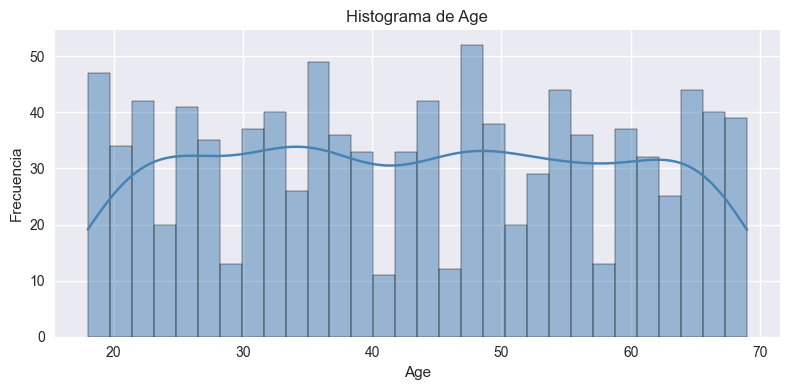

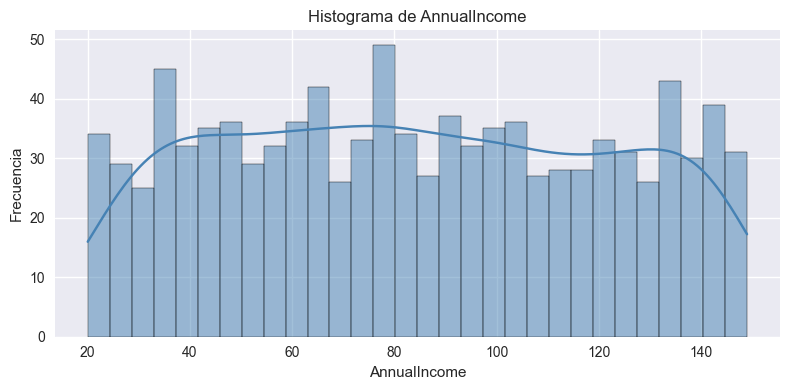

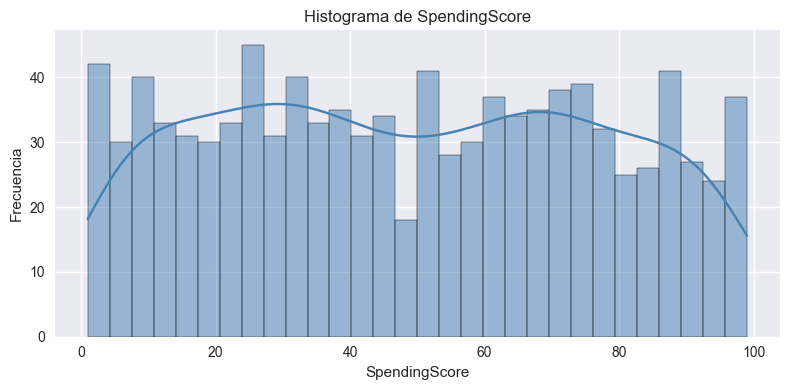

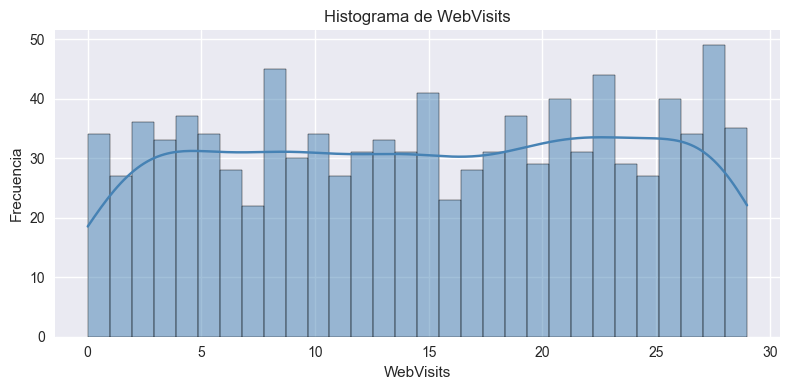

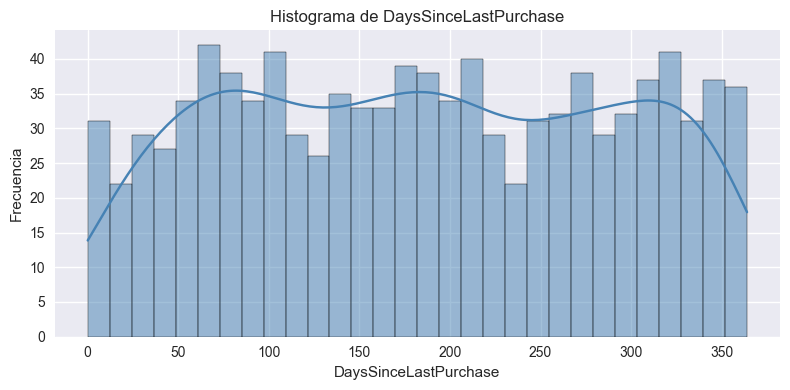

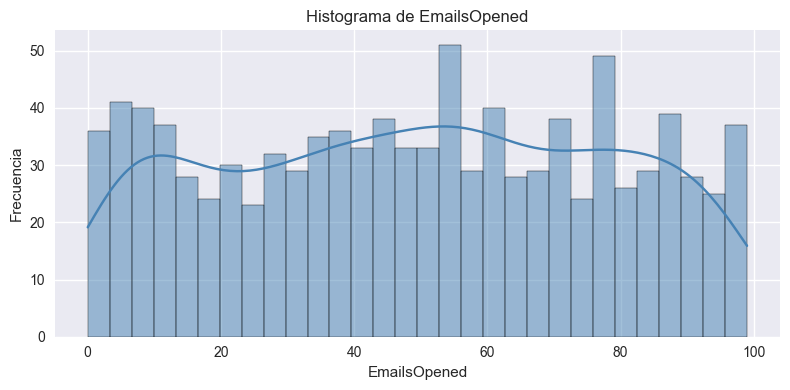

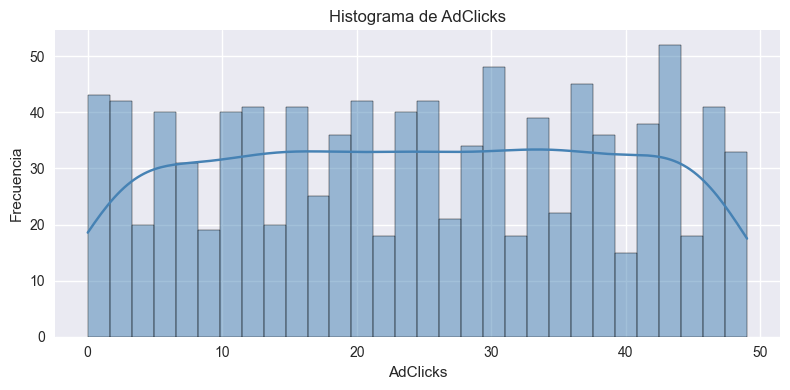

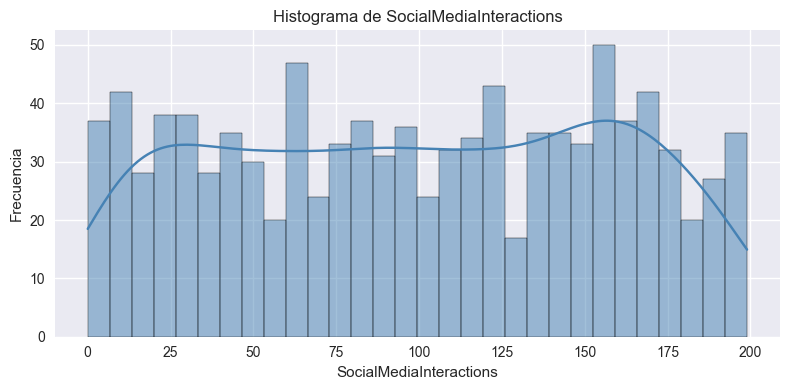

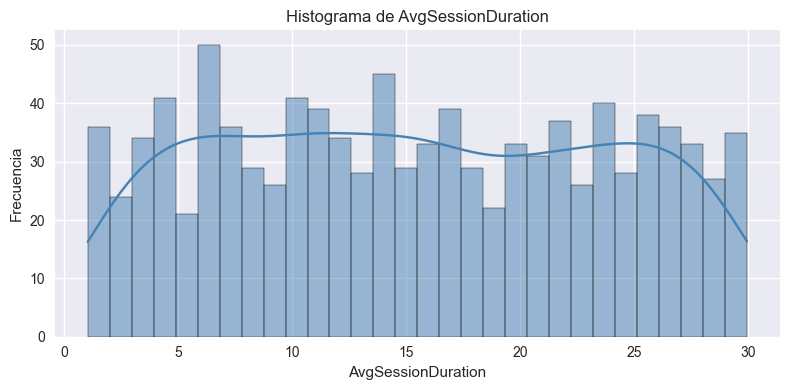

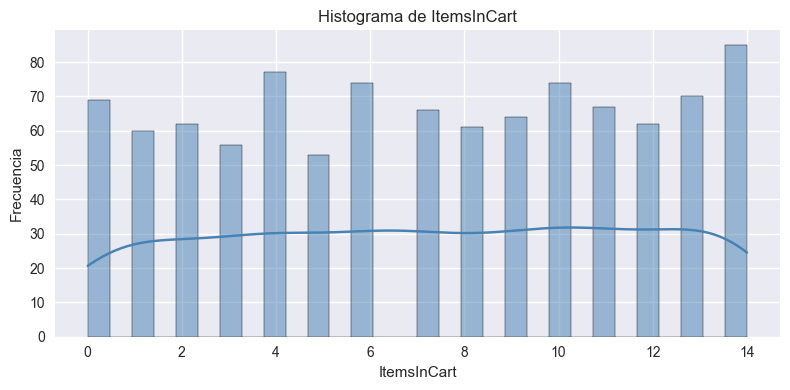

In [7]:
# importamos Librerias para graficar y visualizar mejor la distribucion de los datos
# Los histogramas nos permite ver la distribucion de los datos de columnas numericas, con el 
# objetivo de ver si hay dispersion, si hy informacion sesgada etc.



import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Crear gráficos
plt.style.use("seaborn-v0_8")

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

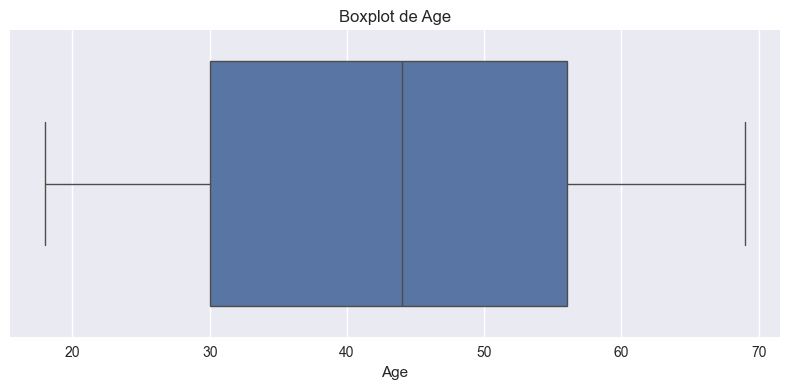

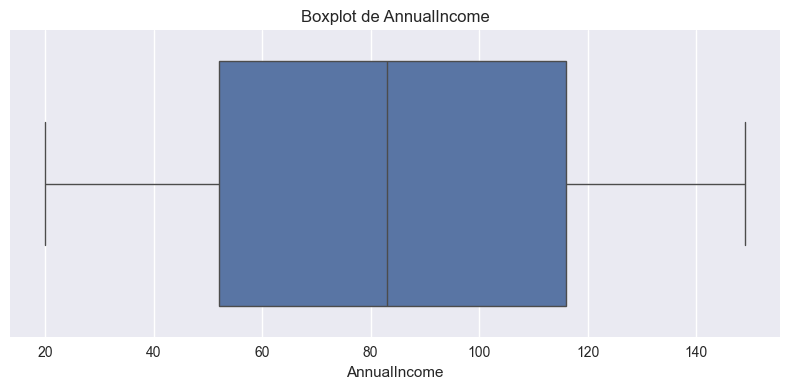

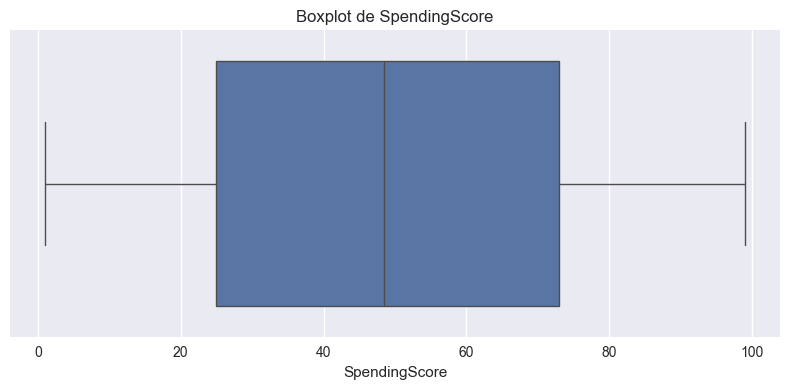

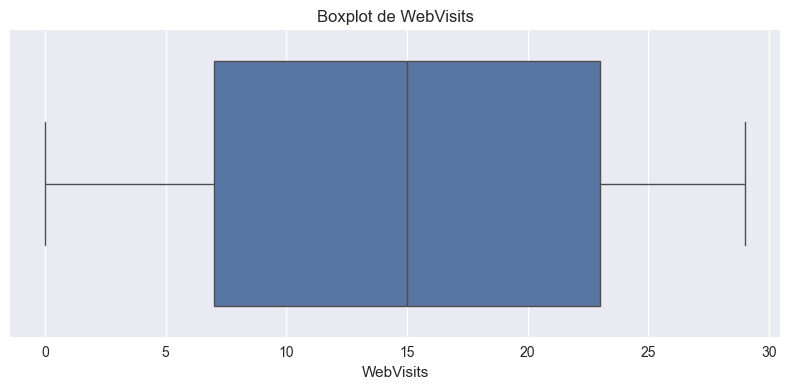

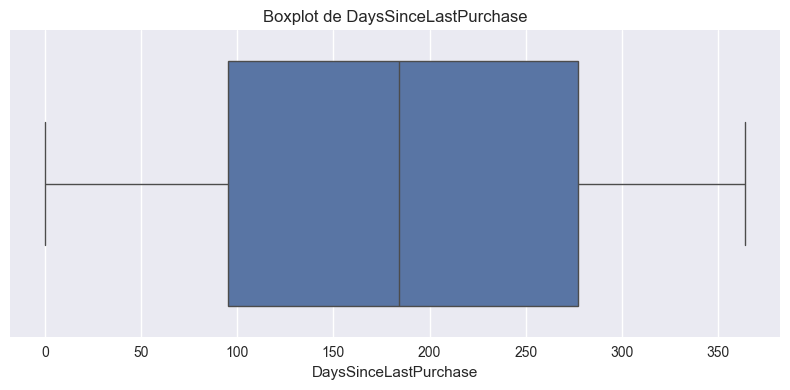

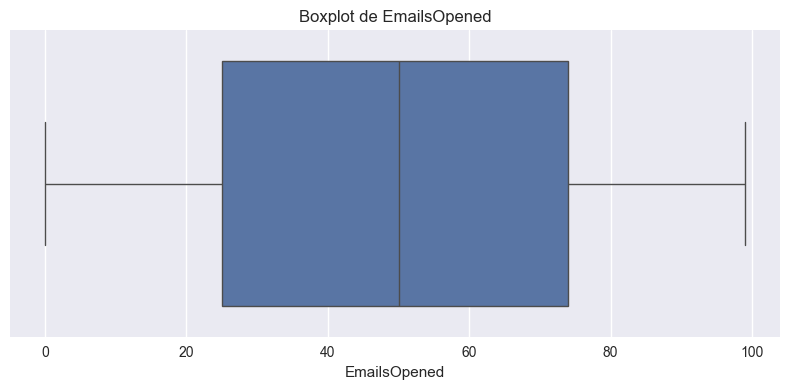

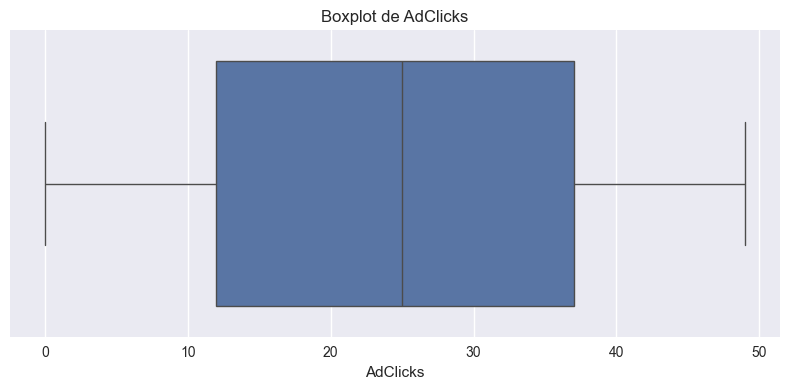

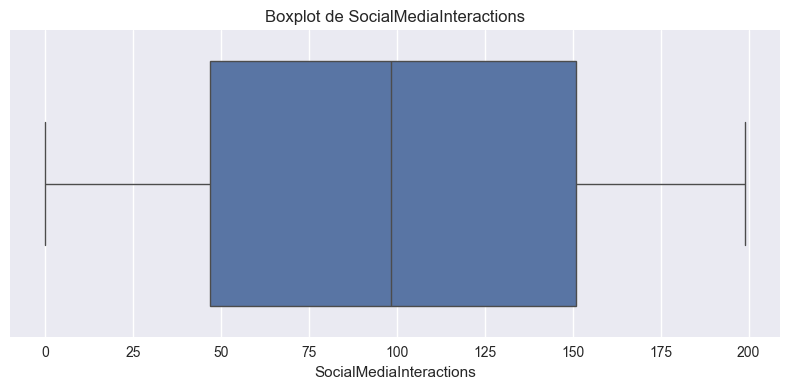

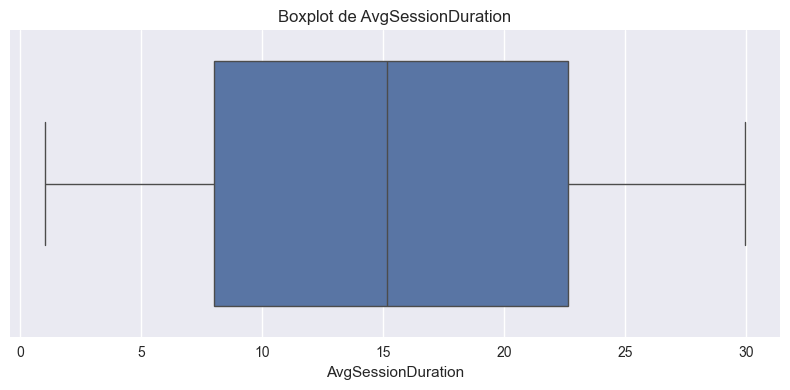

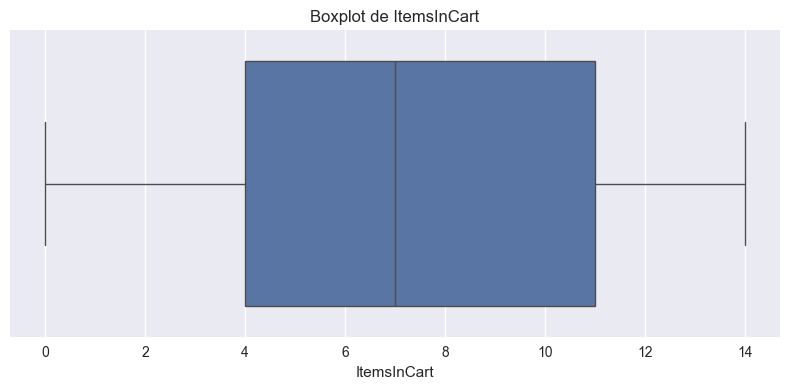

In [8]:
#boxplot para ver rangos y posibles outliers

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.style.use("seaborn-v0_8")

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


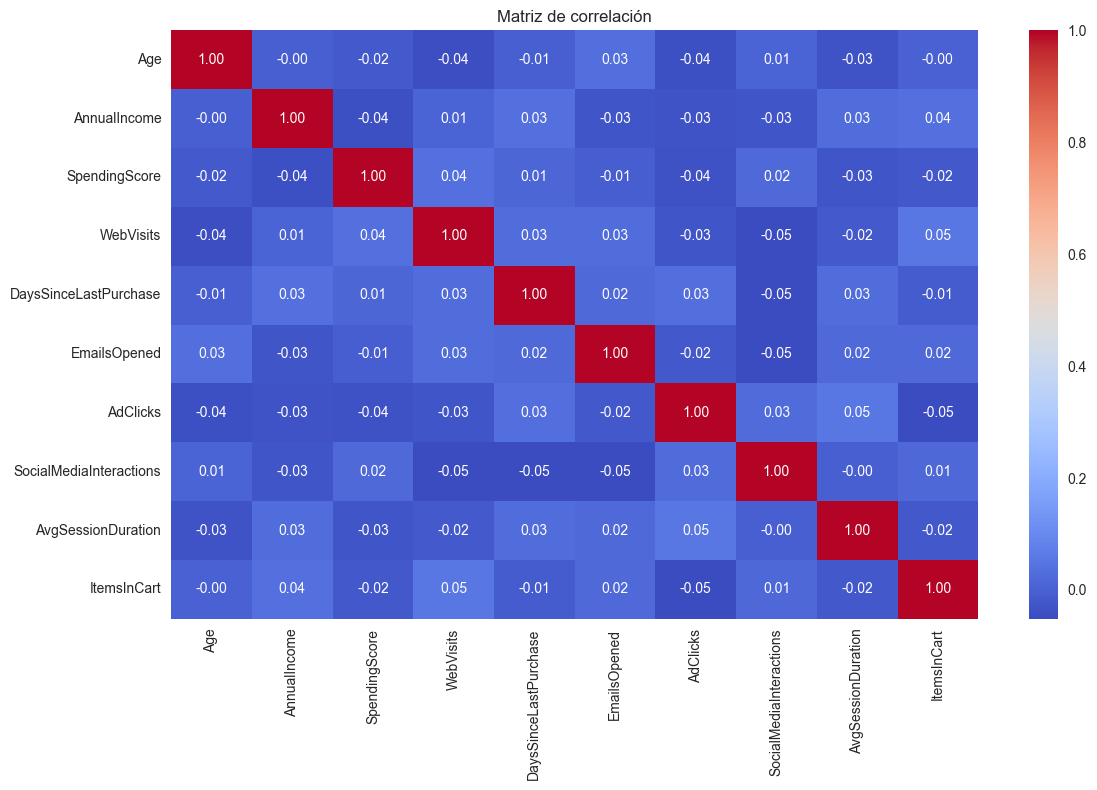

In [9]:
# Matriz de correlacion - nos permite entender que tan relacionado estan los datos entre si 

plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


Interpretacion de la Matriz de Correlacion

A simple vista podemos observar que no existen relaciones lineales fuertes entre las variables. Los coeficientes obtenidos se mantienen entre -0.05 y 0.05 (ceracanos a ceros), lo que indica que los cambios en una variable no están asociados de manera significativa con cambios en las demás. En general, el df presenta un conjunto de variables prácticamente independientes, lo que implica que no hay patrones lineales claros dentro de los datos.

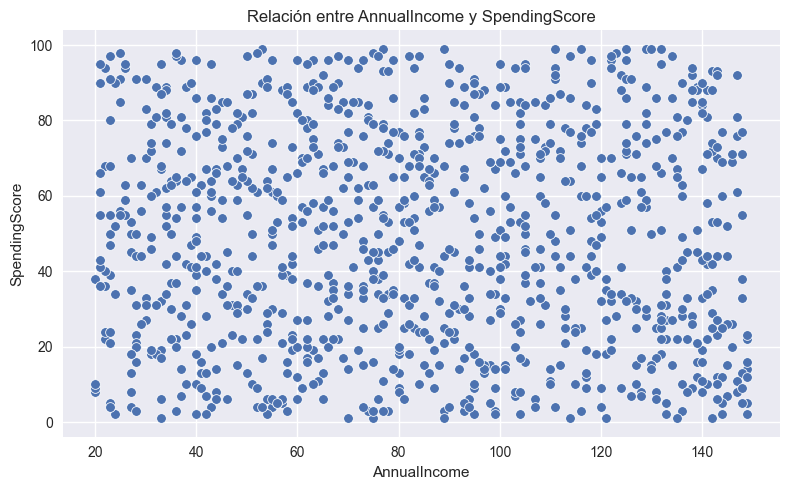

In [10]:
# Realizaremos un grafico adicional llamado Scatter plot (Patrones entre variables)
# Analizaremos dos columnas para ver si hay relacion ( relativamnete entre las mas probables )

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["AnnualIncome"], y=df["SpendingScore"])
plt.title("Relación entre AnnualIncome y SpendingScore")
plt.xlabel("AnnualIncome")
plt.ylabel("SpendingScore")
plt.tight_layout()
plt.show()


Respecto a la grafica confirmamos lo que nos dice la variable de correlacion realmnete no hay relaciones fuertes entre las varibles numericas 

# Paso 3. Preparación y escalado de datos.

Selección de características 

La columna CustomerID no aporta información útil para identificar patrones, ya que solo es un identificador único asignado a cada cliente. No representa una característica real del comportamiento, preferencias o atributos de los datos.

Si la mantuviéramos, podría incluso afectar negativamente los análisis, porque PCA interpretarían ese número como una variable con significado, cuando no lo tiene.

Decisión: Eliminar la columna CustomerID antes de realizar PCA o cualquier modelado.

Justificación: CustomerID no contiene información estadística relevante; es únicamente una etiqueta para identificar filas.

In [11]:
df = df.drop(columns=["CustomerID"])

In [12]:
# Aplicando tecnica de estandarizacion 
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]


In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Lo convertimos en un nuevo a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)


El escalado de datos es un paso indispensable antes de aplicar técnicas como PCA, ya que esta metodología se basa en la variancia de las características. Si las variables están en diferentes escalas (por ejemplo ingresos en miles vs. puntuaciones entre 1 y 100), aquellas con valores más altos dominarán los componentes principales y distorsionarán los resultados. StandardScaler estandariza todas las variables para que tengan media 0 y desviación estándar 1, asegurando que cada característica aporte equitativamente al análisis y evitando sesgos en la reducción de dimensionalidad.

In [14]:
#aqui una previa visualizacion del df escalado 
df_scaled.head()

,Age,AnnualIncome,SpendingScore,WebVisits,DaysSinceLastPurchase,EmailsOpened,AdClicks,SocialMediaInteractions,AvgSessionDuration,ItemsInCart
0,0.633624,-0.514229,0.288119,1.259900,1.676468,0.310140,1.636084,0.469964,0.523080,0.863366
1,-0.746534,-1.053366,0.852644,0.012474,-0.089326,1.673318,0.174922,0.815246,0.495502,0.407041
2,1.422285,-0.891625,1.170190,-1.461757,-1.605606,0.554813,-0.103395,-0.790316,1.024276,-1.190094
3,0.830789,-0.945539,-0.946779,0.692889,-0.348437,-0.284065,0.383660,-0.393242,0.874397,-0.277445
4,-0.615090,-0.622056,0.146988,0.919693,0.457686,-1.612289,0.801134,1.022415,1.687341,1.547852


# Paso 4. Aplicación del Análisis de Componentes Principales (PCA).

In [15]:
#aplicando tecnica

from sklearn.decomposition import PCA

# Instanciar PCA sin limitar componentes todavía
pca = PCA()
pca_components = pca.fit_transform(df_scaled)


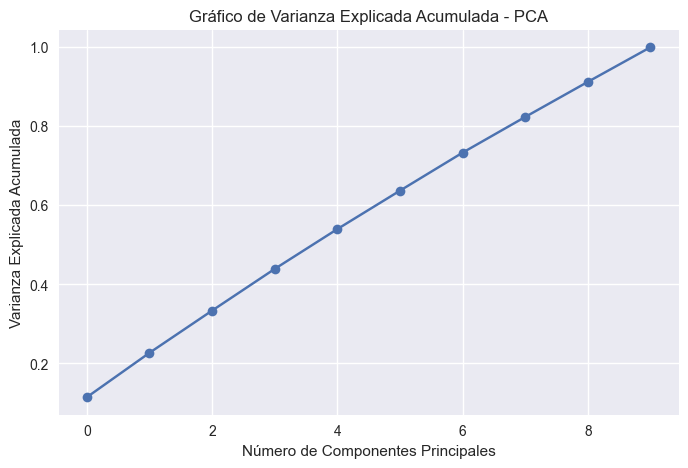

In [16]:
import numpy as np

# Varianza explicada acumulada
var_acum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(var_acum, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Gráfico de Varianza Explicada Acumulada - PCA")
plt.grid(True)
plt.show()


### Jusfitificacion

El gráfico de varianza explicada acumulada muestra que los componentes principales aumentan su contribución de forma uniforme. Esto indica que las variables originales no presentan correlaciones fuertes entre sí, por lo que el PCA no logra concentrar la información en pocos componentes. Cada componente explica aproximadamente el mismo porcentaje de la varianza.

Siguiendo el criterio común de conservar entre el 85 % y 95 % de la varianza total, observamos que los primeros 8 componentes permiten retener alrededor del 88 %, por lo que se consideran adecuados para representar los datos reduciendo ligeramente la dimensionalidad sin una pérdida significativa de información.

# Paso 5. Interpretación de los componentes principales.

### Los loadings 
Son los coeficientes que indican cuánto aporta cada variable original a un componente principal.

Un valor alto (positivo o negativo) = esa variable tiene mucho peso en ese componente.

Un valor positivo = la variable aumenta junto con ese componente.

Un valor negativo = la variable se comporta en sentido contrario del componente.

In [ ]:
# Análisis de loadings (cargas de cada variable en cada componente)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=df_scaled.columns
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Age,0.028696,-0.289923,-0.455365,0.453065,-0.253196,0.270923,-0.199642,0.519013,-0.168445,0.165477
AnnualIncome,0.231764,0.260361,-0.405154,-0.447624,-0.382130,0.121433,0.156199,0.027740,0.471763,0.324782
SpendingScore,0.090257,-0.258382,0.615335,0.024973,-0.257343,0.438646,0.244227,-0.063596,-0.069959,0.467559
WebVisits,0.516911,0.087533,0.370997,-0.144492,0.195914,-0.087369,-0.127817,0.670418,0.172394,-0.158402
DaysSinceLastPurchase,0.172075,0.461767,0.148648,0.137294,-0.391406,0.383122,-0.483093,-0.234059,-0.083884,-0.347903
EmailsOpened,0.312736,0.094210,-0.083269,0.576157,0.437173,0.199353,0.115365,-0.262944,0.480747,0.100006
AdClicks,-0.446200,0.407106,0.146269,0.035005,0.222638,-0.059124,-0.448312,0.167973,0.097562,0.566366
SocialMediaInteractions,-0.410849,-0.328856,0.006597,-0.282681,0.203746,0.533818,-0.163491,0.089264,0.420496,-0.324216
AvgSessionDuration,-0.160668,0.507549,-0.099510,-0.021827,0.237912,0.411305,0.536784,0.256199,-0.339228,-0.107596
ItemsInCart,0.386005,-0.141923,-0.227699,-0.374761,0.439613,0.260112,-0.311807,-0.224959,-0.418195,0.234373


### Analisis
##### PC1 alto:

* Muchas visitas web
* Agregan más ítems al carrito
* Abren correos promocionales

PC1 bajo:

* Interactúan más con redes sociales
* Hacen más clics en anuncios

Conclusión: PC1 separa a los clientes según el tipo de actividad digital que tienen.

##### PC2 alto:

* Sesiones largas
* Mucho clic a anuncios
* Mucho tiempo sin comprar
* Poca interacción en redes

PC2 bajo:

* Más interacción social
* Más jóvenes

Conclusión: PC2 parece representar interacción con campañas publicitarias y tiempo desde la última compra.

##### PC3 alto:

* SpendingScore alto
* Más visitas web
* Clientes más jóvenes

PC3 bajo:

* Ingresos altos
* Clientes mayores

Conclusión: PC3 representa un comportamiento de interés en comprar relacionado con juventud y menor ingreso.







### Bautizando los Componentes

##### PC1
Intensidad de Interacción Digital
* Resume visitas, emails, carrito y patrones de actividad digital.

##### PC2
Capacidad de Gasto y Recencia de Compra
* Relaciona ingresos, tiempo en plataforma y días desde la última compra

##### PC3
Intensidad de Consumo
* Clientes que gastan más, visitan más y suelen ser más jóvenes.

##### PC4
Compromiso Directo con Correos y Plataforma
* Usuarios que interactúan principalmente con correos y navegación.

In [ ]:
#Varianza explicada
pca.explained_variance_ratio_


array([0.1146384 , 0.11228176, 0.10682246, 0.10546887, 0.10075626,
       0.09718255, 0.09615385, 0.09030132, 0.08879249, 0.08760204])

## Componentes seleccionados 

Basado en la varianza explicada acumulada, seleccionare los 9 componentes principales, los cuales explican aproximadamente 91.21% de la variabilidad total del conjunto de datos. Este valor se encuentra dentro del umbral recomendado del 85% al 95%, lo que permite reducir la dimensionalidad manteniendo casi toda la información relevante del dataset. 


# AA2-EV02 - Paso 1 Preparación de los datos para clustering.

Crearemos el dataset reducido unicamente con los 9 componentes para aplicar la tecnica de clustering


In [19]:
# df con los 9 componentes seleccionados
df_pca = pd.DataFrame(pca_components[:, :9], columns=[f'PC{i+1}' for i in range(9)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.287851,1.176072,0.781667,0.340712,0.652164,1.423505,-1.870335,0.923549,-0.325072
1,-0.009699,-0.163803,1.032371,0.716915,1.642931,1.076641,0.354698,-0.744091,0.404809
2,-1.171702,-0.857374,-0.244810,2.026587,-0.199462,0.109489,1.985530,0.331192,-0.784851
3,-0.328596,0.399261,-0.319205,0.673864,0.633911,-0.500827,-0.049625,1.401722,-0.816182
4,-0.549767,0.744995,0.769630,-1.873418,1.120379,1.190922,-0.566336,0.897478,-1.566701


# Paso 2. determinar el número óptimo de clústeres (K). 

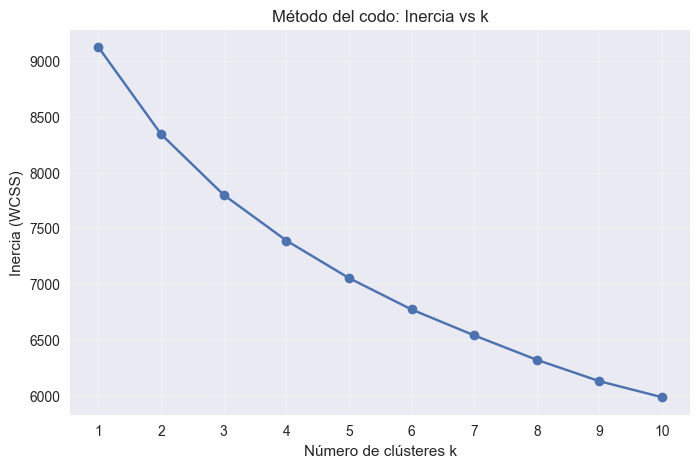

In [20]:
# 1) Método del codo - calcular inercia (WCSS) para k de 1 a 10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# df_pca: el DataFrame con los 9 componentes que creaste (ver paso anterior)
X = df_pca.values  # datos para clustering

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   # inercia = WCSS

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.xticks(K_range)
plt.xlabel("Número de clústeres k")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del codo: Inercia vs k")
plt.grid(alpha=0.3)
plt.show()


k=2 -> silhouette score = 0.0842
k=3 -> silhouette score = 0.0799
k=4 -> silhouette score = 0.0809
k=5 -> silhouette score = 0.0818
k=6 -> silhouette score = 0.0834
k=7 -> silhouette score = 0.0840
k=8 -> silhouette score = 0.0870
k=9 -> silhouette score = 0.0895
k=10 -> silhouette score = 0.0889


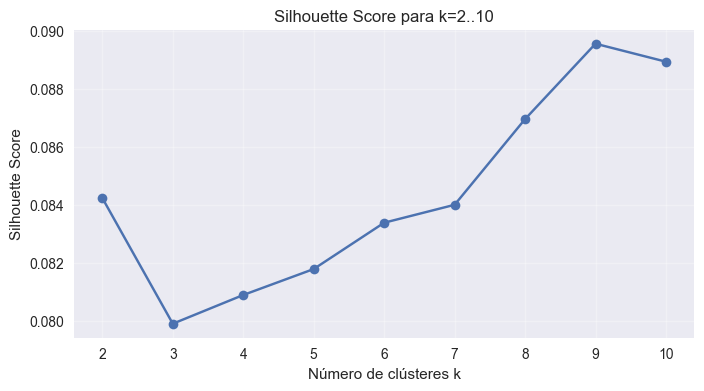

In [21]:
from sklearn.metrics import silhouette_score
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Mostrar resultados
for k, score in zip(range(2,11), sil_scores):
    print(f"k={k} -> silhouette score = {score:.4f}")

# Graficar silhouette scores
plt.figure(figsize=(8,4))
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("Número de clústeres k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score para k=2..10")
plt.grid(alpha=0.3)
plt.show()


In [22]:
# 3) Ajustar KMeans final con el k elegido
k_opt = 4   # <-- cambia este número por el k que decidas
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
labels = kmeans_final.fit_predict(X)

# Añadir etiquetas al DataFrame de componentes
df_pca['cluster'] = labels

# Tamaño de cada clúster
cluster_counts = df_pca['cluster'].value_counts().sort_index()
print("Tamaño de cada clúster:")
print(cluster_counts)

# Centroides en el espacio PCA
centroids = kmeans_final.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_pca.columns[:-1])  # excluye 'cluster'
centroids_df.index = [f'centroid_{i}' for i in range(k_opt)]
centroids_df


Tamaño de cada clúster:
cluster
0    236
1    249
2    248
3    267
Name: count, dtype: int64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
centroid_0,-1.039284,0.23391,-0.189013,0.800013,0.102836,0.131902,-0.018748,-0.286986,0.097412
centroid_1,1.158175,0.12690,-0.181334,0.520993,-0.100869,-0.282456,-0.225180,0.002700,0.185697
centroid_2,-0.000830,0.32710,0.929894,-0.460580,0.322932,0.265937,-0.021973,0.541580,0.005978
centroid_3,-0.160707,-0.62892,-0.527545,-0.765193,-0.296779,-0.100187,0.246980,-0.251893,-0.264833
